Project 1: Arduino as a Laboratory Interface
========================

The purpose of this project is twofold:

1. to familiarize yourself with some of the tools we'll be using in this course: the Arduino compiler, simulator and microcontroller, electronic breadboards, "C", "python" and jupyter notebooks, AND
    
2. to build a simple circuit that enables us to study the behvior of an LED.

As you progress through the project please be sure to ask questions and get help if you are confused or unclear on how to proceed. Since most students taking this course have used python in intro physics, and have at least one course in programming computers in "c" or "c++". As a result the treatment of those topics will be fairly brief. If you have not use python and/or c/c++ before please alert your instructor and they will provide you with extra materials and instruction as necessary.

Here are some references you may find helpful:

1. Dive into python (intro to the python language) [http://python.org](http://python.org)
2. Arduino Simulator [http://tinkercad.com](http://tinkercad.com) (this simulator also simulates components and breadboards!)
3. Arduino programming [http://arduino.cc](http://arduino.cc)
4. Intro to C programming: [C programming text](http://www-personal.acfr.usyd.edu.au/tbailey/ctext/ctext.pdf)

Tasks: 

1. Set up the circuit [shown below](#Project-1-Schematic-Diagram). Choose values for R1 and R2 that make sense. Ask if you need help!

2. [Program your Arduino](#Arduino-Programming) to collect data as you adjust the driving current through the diode.

2. Run the program to collect voltage vs. time data from the Arduino

3. Analyze (you read the data from excel, but please use jupyter to do any fitting).

4. Compare results with expectations. See the example [linear](#Linear-Analysis) and [non-linear](#Non-Linear-Analysis) analysis python programs given below.

5. Carry out the [Statistical Exercises](./Stats1.ipynb) for project one.

6. Submit a project report describing your results.

Criteria for success:

See the [rubric](../report_rubric.pdf) and the [sample](../sample/Sample%20Report.ipynb).


Controlling a Voltage with Arduino
--------------------------------

The next few cells we'll be reviewing the charging and discharging of capacitors. We need this because we'll be using an RC circuit to control the driving voltage across the diode circuit that forms the core of this project.

Charging and Discharging Capacitors
---------------------------------

Let's start with RC Circuits. Suppose we have a charging circuit like that shown in Fig 1 where the voltage source (V1 in Fig. 1) can be turned on and off periodicallly. This produces a current that alternately charges and discharges the capacitor. Suppose the voltage supplied by V1 is 10V when it's "on" and 0V when it's "off". If we assume the capacitor is initially uncharged when V1 is first turned on, there will be a potential drop of 10V across the resistor R1 initially. This will produce an initial current of 10V/10k$\Omega$ = 1mA. As the capacitor charges this current will diminish, approaching zero in a few RC time constants (in this case, as you can see from Fig. 1, RC=50ms). If the source is set up to toggle between "on" and "off" every 500ms, there will be ample time for the capacitor to become very nearly fully charged before the voltage toggles to "off". When the voltage does toggle "off" the current will flow in the opposite direction slowly draining the charge on the capacitor. As you learned in intro physics the voltage on the capacitor as a function of time during the charging and discharging cycles is exponential (see e.g., Chabay & Sherwood, vII, 4th ed, pp785-786). 

![Fig. 1 A typical RC Circuit](circ.png)

\begin{equation}
V(t) = V_0\left(1-e^{-t/RC}\right); {\rm (charging)}
\end{equation}

\begin{equation}
V(t) = V_0 e^{-t/RC}; {\rm (discharging)}
\end{equation}

Let's use some python to visualize this result. 

Populating the interactive namespace from numpy and matplotlib


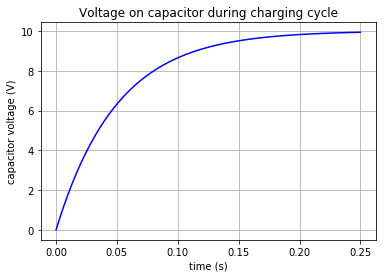

In [1]:
# invoke the pylab magic to get access to plotting/array tools
#
%pylab inline   

#
# Set up some constants
#
V0=10.0 # Volts
R1=10e3 # Ohms
C1=5e-6 # Farads

"""
for the first 0.25 sec we'll be charging.
"""
t1 = linspace(0, 0.25, 100)     # time array, 100 values evenly spaced beteen 0 and 0.25 seconds
Vc = V0*(1.0-exp(-t1/(R1*C1)))  # array of voltages on the capacitor at different times
xlabel('time (s)')              # make the graph purty, give it x and y labls and a title
ylabel('capacitor voltage (V)')
title("Voltage on capacitor during charging cycle")
grid()                          # add a grid so it's easier to read
plot(t1, Vc, 'b-')              # plot the data, t1 on the horizontal, Vc on the vertical, using a blue line

You can see how the capacitor voltage is very close to 10V at the end of the 250ms charging cycle. 

In [2]:
Vf = Vc[-1]   # take the last voltage in the Vc array and check it. Note that a '-1' index gets the last value
print(Vf)

9.93262053001


So, the voltage on the capacitor is about 68mV shy of 10V. Or, if you'd like (using a cash analog) we could've gotten up to a \$10 reward, but we still have a mere 7 cents to go.

Close!

What about the discharging?

The final voltage after 250ms of discharge is: 0.0669254706932


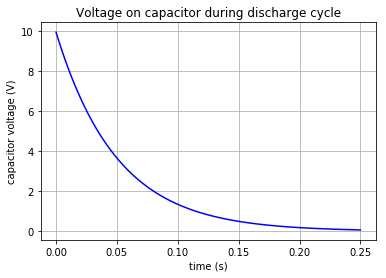

In [3]:
Vc2 = Vf*exp(-t1/(R1*C1))       # compute the voltage during the discharge cycle.
xlabel('time (s)')              # make the graph purty
ylabel('capacitor voltage (V)')
title("Voltage on capacitor during discharge cycle")
grid()
plot(t1, Vc2, 'b-') # plot the data, t1 on the horizontal, Vc2 on the vertical using a blue line

Vf2 = Vc2[-1] # take the last voltage
print("The final voltage after 250ms of discharge is:", Vf2)

Again (using a cash analog), here we started with \$9.93 and we ended up with less than 7 cents in the end. 

Practically nothing. ;-)

You should familiarize yourself with these equations. Here are some questions to help you check your understanding:

1. What is the voltage on the capacitor at 0.1s after the voltage source turns "on"? (ans 8.65V)

2. What is the voltage on the capacitor at 0.15s after the voltage source turns "off"? (ans 0.50V)

3. How long after the voltage source turns "on" does the voltage on the capacitor reach 5V? (ans 0.035s)

4. How long after the voltage source turns "off" does the voltage on the capacitor reach 2V? (ans 0.080s)

# So what are we doing?

This week we'll be using the Arduino <http://arduino.cc> microcontroller to study the behavior of an LED. The idea is to drive the LED with different currents and to measure the voltage drop across the LED. There is a standard model ([https://en.wikipedia.org/wiki/Shockley_diode_equation](https://en.wikipedia.org/wiki/Shockley_diode_equation)) for this relationship:

$$ I = I_o (e^{\frac{\eta q V_d}{k_b T}}-1) $$

We'll want to compare the data we collect with the predictions of this model.

What follows is an introduction to Arduino programming. If you've already coded a lot in "C" or "C++" this should all be pretty easy. If you haven't, it's time to learn! The good news is that our coding will be pretty elementary. All we really need are simple loops, variables, arrays and functions. 


Arduino Programming
------------------

If you open the Arduino IDE and choose File -> Examples -> Basic -> Blink you'll find this code in your IDE window:

    /*
      Blink
      Turns on an LED on for one second, then off for one second, repeatedly.

      Most Arduinos have an on-board LED you can control. On the Uno and
      Leonardo, it is attached to digital pin 13. If you're unsure what
      pin the on-board LED is connected to on your Arduino model, check
      the documentation at http://arduino.cc

      This example code is in the public domain.

      modified 8 May 2014
      by Scott Fitzgerald
     */


    // the setup function runs once when you press reset or power the board
    void setup() {
      // initialize digital pin 13 as an output.
      pinMode(13, OUTPUT);
    }

    // the loop function runs over and over again forever
    void loop() {
      digitalWrite(13, HIGH);   // turn the LED on (HIGH is the voltage level)
      delay(1000);              // wait for a second
      digitalWrite(13, LOW);    // turn the LED off by making the voltage LOW
      delay(1000);              // wait for a second
    }
    
You can actually run this on your Arduino right away! Make sure you go to Tools -> Board and select the correct Arduino type. Then go to "Tools -> Port" and select the serial port to which your Arduino is assigned. (If you diconnect, then check "Tools -> Port", then reconnect and check "Tools -> Port" again you shoud be able to see which is the "new" port in the list the corresponds to your Arduino.)

Let's go through this code and describe what's happening.

If you've already taken "c/c++" programming you'll be familiar with most of these ideas right away. If you've not taken a programming course you may need some extra support/documentation. Please see me if this is the case and I'll be sure to provide some additional resources.

First the program is processed by a 'compiler' that reads the text and interprets it as a set of steps to be translated into machine instructions for the microcontroller. Lines in the text that start with a "#" are meant to be processed *before* the translation process begins, so these are called "compiler directives" rather than instructions.

Next, anything between '/*' and '*/' is a comment. Anything after '//' on a line, is a comment.

There are two critical functions in an Ardiuno program 'setup' and 'loop'. 

Setup
-----

The 'setup' function is executed any time the Arduino is reset. This happens:

1. when you upload a new program 
2. when you first connect with a serial port  
3. when you push the reset button, or 
4. when ground the reset pin.


Let's look at the setup function for this example. Note that it only does one thing: declare that pin 13 on the Arduino is going to be used for output.  It turns out pin 13 on most Arduinos is connected to an LED, so when the pin goes high, you can see light. Other things that typically happen in setup are initialization of variables, arrays, setting various ports' intial values and generally getting things ready to go.

    void setup() {
      // initialize digital pin 13 as an output.
      pinMode(13, OUTPUT);
    }

Loop
----

The 'loop' function is called immediately after 'setup'. After loop completes it is called again, and again, and again, forever (or until power is removed/lost, or the board is reset). The loop function is where most of the work of the program happens.

    void loop() {
      digitalWrite(13, HIGH);   // turn the LED on (HIGH is the voltage level)
      delay(1000);              // wait for a second
      digitalWrite(13, LOW);    // turn the LED off by making the voltage LOW
      delay(1000);              // wait for a second
    }

This program's 'loop' function first sets pin 13 high, waits for 1 sec, then sets pin 13 low, waits another second, then exits. This lights the LED, then turns it off, over and over, each second, forever. Notice that this is a *lot* like the voltage source in our example circuit! In fact, that similarity is exactly what we'll use to develop this project.

Basic Concepts in "c"
===========

In case you're not very familiar with the "c" programming language, these explanations may help get you up to speed.

Macros
------

In the example program there is a line:

    digitalWrite(13, HIGH);   // turn the LED on (HIGH is the voltage level)

it's a bit hard to tell what's going on. The reader may not remember/realize that pin 13 is connected to the built-in LED on the Arduino. Wouldn't it be nice if we could communicate that to them in some simple way? That's one of the most useful applications of a commonly used compiler directive called a "macro". You can create your own macros (I like to do this at the very beginning of my programs, so they are easy to find). Here's how it works:

    #define LED 13            // Pin 13 is the LED
    
The first character on the line is '#', which tells the compiler that it's a special directive, not a step in the program. The 'define' means we're defining a macro, in this case a constant. When the compiler sees this macro it then knows that anywhere in the program that has 'LED' it's to be replaced by the value '13'. Then our digitalWrite function call looks like this:

    digitalWrite(LED, HIGH);   // turn the LED on (HIGH is the voltage level)
    
Isn't that clearer? Of course it is. ;-) Below is a list of macros that we can use to define constants needed by the program to run project 1.

    #define OUTPIN 3          // apply output voltage to pin 3
    #define IN_ANALOG 0       // which analog pin are we reading?
    #define NUMVALUES 40      // how much data to collect?
    #define STARTUP_DELAY 500 // how long to hold voltage high initially
    #define DECAY_DELAY   10  // how long to measure
    #define LOOP_DELAY 500    // how many millis to delay each time
    
Because these definitions are constant, they can't be changed during execution. It is a convention to use all upper case characters in the names of constants so the reader can tell that these things are not variable in the context in which they appear.
    
Variables
---------

Most programs need some values that can change. These are *variables*. A variable needs to be decared with a type and within a scope. The *type* of a variable determines the amount of memory required for the variable's value and the scope determines the times during which the variable is needed during program execution. Basically if the variable is declared outside of any function, it's scope is *global* and it is always available. If it is declared within a function it's scope is *local* (only within the function). It's memory is 'allocated' within the function, and 'released' outside the function. Let's look at an example:

    int x;

This declares `x` to be an integer (16 bits on the Arduino) and since it's not inside a function, it's scope is global. Here's another:

    int foo(int y) {
        int x=y;
        
        if (y>9) {
            x = 3*y;
        }
        
        return 100 - x;
    }

Here `x` is a local variable that is only defined within the function `foo`. You can see that it is used as a part of computing the result of the function. If you tried to access the value of `x` outside this function the compiler would complain that `x` is undefined.

Arrays
------

An array is a collection of memory of a particular type. An array is declared using square brakets: `[]` like so:

    int myArray[16];
    
this would allocated an array called `myArray` with space for 16 integers. You can access individual elements within the array by using that particular element's address or `index`. The index values start at zero and go up to one less than the number of elements, in this case, 15. For example to set the `zeroth` element of `myArray` to 9 you'd use:

    myArray[0] = 9;
    
An array element can be use just like a normal variable. We will find an array useful so that we can aqcuire and save data quickly.

Handling Conditions
------------------

Sometimes we want one thing to happen `if` a variable has one value, and something `else` to happen if it has a different value. This is most easily accomplished using an `if` statement. Here is a simple example. Suppose we have a heater and a temperature sensor. We decide that we want the heater to run if the temperature sensor measures any voltage *below* 0.488V, and we want to turn it off if it measures *above* 0.488V. Suppose further that the temperature sensor is connected to analog input pin 0, and the heater is connected to digital output pin 3. This code would do the trick:

    #define IN_ANALOG 0
    #define OUT_DIGITAL 3
    
    int val;  // val will get the integer representation of the input voltage
    
    val = analogRead(IN_ANALOG);  // read current value on IN_ANALOG pin, val is between 0 and 1023.

    if (val < 100) {
        Serial.println("Voltage is below 0.488 Volts");
        digitalWrite(OUT_DIGITAL, HIGH);  // turn the heater on
    } else {
        Serial.println("Volgate is above 0.488 Volts");
        digitalWrite(OUT_DIGITAL, LOW);   // turn the heater off
    }

The `AnalogRead` function is used to measure analog voltages on the analog input pins of the Arduino Microcontroller. Voltages bewteen 0.0V and 5.0V are mapped onto integer values between 0 and 1023. The `DigitalWrite` function sets an output pin `high` (which is 5.0V) or `low` (which is 0.0V) as shown. This example sets pin 3 high (5V) if the voltage on analog input 0 is below 0.488 Volts and sets pin 3 low (0V) if the voltage on analog input 0 is above 0.488 V. 

For Loops
---------

There are several different ways to create looping behaviors in "c", but the most common is the `for` loop. Here is an example `for` loop that sets all the elements of `myArray` to zero.

    #define N 16

    int i;
    int myArray[N];
    
    for (i=0; i<N; i++) {
        myArray[i] = 0;
    }
    
The `for` loop begins with `for` and contains a set of three expressions (clauses) separated by semi-colons. The three expressions:

1. initialize the loop control variable(s), `(i=0)`
2. check to see if the loop should continue and `(i<N)`
3. update the loop control variables `(i++)`

respectively. Let's look at those parts one at a time. First `i` is initialized to zero. This way we know where things are starting. Since the goal of this loop is to set all the elements of `myArray` to zero this means we'll be starting with the `zeroth` element. Before the loop exectutes each iteration it evaluates the middle clause to see if it should continue execution. In this case it checks to see if `i<N`. Since `N` is `#define`ed to be 16, this is checking to make sure `i<16`. The first time through the loop `i=0` so this is clearly satisfied. Remeber that the last element of the array has an index `i=15` so checking that `i<16` will allow no higher index than this. Good! Each time the loop completes the `update` clause `(i++)` is exectuted. `i++` is shorthand in "c" for `i=i+1`. This increments the loop control variable `i` by one at the end of each iteration. Note the net effect is that the loop is exectuted once for each value of `i` from `i=0` to `i=15`.

Functions
---------

A function is a body of code that encapsulates some operation. Sometimes functions produce a result that is desired, sometimes they produce side effects that are needed. Here is an example function that produces a result:

    int foo(x) {
        return 3*x;
    }
    
The function `foo` accepts an integer argument and returns a result that is three times the value of the argument passed. Yes, it's a silly function, but you get the idea. Here is a function that has a side effect:

    void updateHeater(int threshold) {
        int val;  // val will get the integer representation of the input voltage

        val = analogRead(IN_ANALOG);  // read current value on IN_ANALOG pin, val is between 0 and 1023.

        if (val < threshold) {
            digitalWrite(OUT_DIGITAL, HIGH);  // turn the heater on if val < threshold
        } else {
            digitalWrite(OUT_DIGITAL, LOW);   // otherwise turn the heater off
        }
    }

So you can call `updateHeater(100)` and it will turn the heater on or off based on a threshold of 100. Note that as a general rule of coding *style* it's preferable to create functions that

1. return a result, but have no side effects OR
2. have side effects, but return no result


Communication
------------

You can send and receive data over the serial port using the [Serial object](https://www.arduino.cc/en/Reference/Serial) on the Arduino. We'll learn more of the details as the course continues. For this week we only need two functions: `print` [(documentation)](https://www.arduino.cc/en/Serial/Print) and: `println` [(documentation)](https://www.arduino.cc/en/Serial/Println). The primary difference between these is that the `println` version sends a carriage return/linefeed so that the next thing printed will be on a new line. You can print(ln) any single value, integer, float or a string of characters. For floating point values you can specify the number of digits past the decimal point as an optional second argument. So, the following program:

    int x=3;
    float y=2.345;

    void setup() {
      Serial.begin(9600);
      Serial.print("The answer is:");
      Serial.print(x);
      Serial.print(",");
      Serial.println(y, 2);
    }

would print out:

    The answer is:3,2.35

Note that the floating point value is rounded to 2 digits as requested.   


## What am I actually supposed to do?

Your tasks:

1. Set up the circuit shown below. Choose values for R1 and R2 that make sense. Ask if you need help!

2. Program your Arduino to collect data as you adjust the driving current through the diode.

2. Run the program to collect voltage vs. time data from the Arduino

3. Analyze (you read the data from excel, but please use jupyter to do any fitting).

4. Compare results with expectations. See the example linear and non-linear analysis python programs given below.

5. Carry out the [Statistical Exercises](./Stats1.ipynb) for project one.

6. Submit a project report (see sample) describing your results.

## Project 1 Schematic Diagram

![Project 1 Circuit](proj1.png)




# Linear Analysis


m = -0.282 +/- 0.001
b = 1.571 +/- 0.003


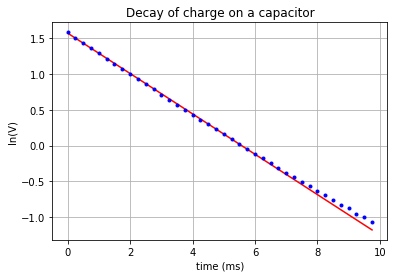

In [4]:
#
# Example "straight line" fit. This example is from the old "RC" lab. You'll be using diode data, but the 
# concept is the same so long as you can manipulate the data so that it's susceptibe to a straight line
# analysis.  sjs
#
#
# This cell loads the data taken earlier and analyzes it by fitting the ln(Vc) vs. t to a straight line.
#
# You are welcome to use this approach if you like
#

import pandas as pd  # load up the pandas (pyData) package
data = pd.read_csv('data.csv')  # read in the data taken previously
from scipy.optimize import curve_fit  # get the curve_fit function from the scipy.optimize library

def fLinear(x, m, b):
    return m*x + b

sigma = (5.0/1023.0)/(data.voltage.values)  # why am I doing this? If you're not sure, ask! You'll learn something.
popt, pcov = curve_fit(fLinear, data.time.values, np.log(data.voltage.values), sigma=sigma)  # do the fit

m=popt[0]          # get the slope
b=popt[1]          # get the intercept

dm = sqrt(pcov[0,0]) # uncertainty in the slope
db = sqrt(pcov[1,1]) # uncertainty in the intercept

ystar=fLinear(data.time.values, m, b)  # use m & b 

title("Decay of charge on a capacitor")
ylabel("ln(V)")
xlabel("time (ms)")
errorbar(data.time.values, np.log(data.voltage.values), fmt='b.', yerr=sigma)
plot(data.time.values, ystar,'r-')
grid()
print("m = %2.3f +/- %2.3f" % (m, dm))
print("b = %2.3f +/- %2.3f" % (b, db))


# Non-Linear Analysis

A = 4.813 +/- 0.012
tau = 3.542 +/- 0.014
How does tau relate to the slope of the linear fit?


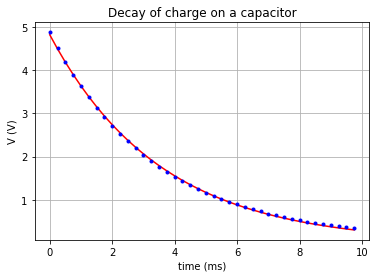

In [5]:
#
# What if you need to do a fit with a different function? No problem! 
#
# curve_fit doesn't care, it works exactly the same way.
#

def fitExp(t, A, tau):
    return A*exp(-t/tau)

sigma = np.ones(len(data))*(5.0/1023.0)  # why am I doing this differently? If you're not sure, ask! You'll learn something.
popt, pcov = curve_fit(fitExp, data.time.values, data.voltage.values, sigma=sigma)  # do the fit

A=popt[0]          # get the slope
tau=popt[1]          # get the intercept

dA = sqrt(pcov[0,0]) # uncertainty in the slope
dTau = sqrt(pcov[1,1]) # uncertainty in the intercept

ystar=fitExp(data.time.values, A, tau)  # use m & b 

title("Decay of charge on a capacitor")
ylabel("V (V)")
xlabel("time (ms)")
errorbar(data.time.values, data.voltage.values, fmt='b.', yerr=sigma)
plot(data.time.values, ystar,'r-')
grid()
print("A = %2.3f +/- %2.3f" % (A, dA))
print("tau = %2.3f +/- %2.3f" % (tau, dTau))
print("How does tau relate to the slope of the linear fit?")

# Don't forget the statistics assignment

You can find it [here](./Stats1.ipynb).